<a href="https://colab.research.google.com/github/wanda15tw/Kaggle/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries & dataset

In [0]:
#!pip install tensorflow==2.0.0-beta1 

In [0]:
#import tensorflow as tf
#print(tf.__version__)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import datetime

In [5]:
listings = pd.read_csv("/content/drive/My Drive/Colab Notebooks/airbnb/AB_NYC_2019.csv", dtype={'id': str, 'host_id':str, })
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
listings.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48879,48895,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,48895,47905,37457,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,34157056,Hillside Hotel,219517861,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,1,18,327,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,NaN,NaN,NaN,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,NaN,NaN,NaN,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [7]:
listings.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop not important columns and handle missing data
*id*, *host_name* and *last_review* are not important
missing values in *reviews_per_month* can be replaced by zero, meaning zeros reviews

In [8]:
listings = listings.drop(['id', 'host_name', 'last_review'], axis=1)
listings = listings.fillna({'reviews_per_month':0})
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
name                              48879 non-null object
host_id                           48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 4.8+ MB


In [9]:
listings.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [10]:
listings.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


### Data Exploratation

#### Top hosts

In [0]:
top_host = listings['host_id'].value_counts().head(10)

In [0]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '1475015')]

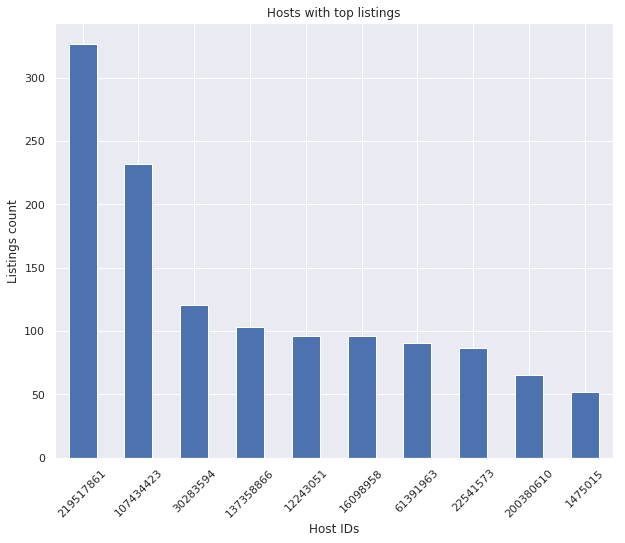

In [13]:
plt1 = top_host.plot(kind='bar')
plt1.set_title('Hosts with top listings')
plt1.set_ylabel('Listings count')
plt1.set_xlabel('Host IDs')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)

In [0]:
#tmp = listings['host_id'].value_counts().head(100).reset_index()
#tmp

In [0]:
#plt.figure(figsize=(20, 5))
#sns.barplot(x=tmp.index, y=tmp.host_id)

barplot here plotted by seaborn is less helpful comparing to pandas plot which plots descendingly and keeps host id as x-axis, whereas seaborn bar plot automatically sort by x-axis.  

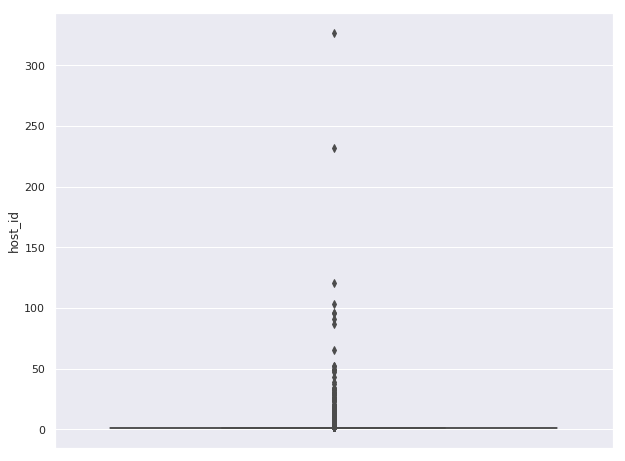

In [16]:
sns.boxplot(y='host_id', data= listings['host_id'].value_counts().reset_index())

#### Neighbourhood Group

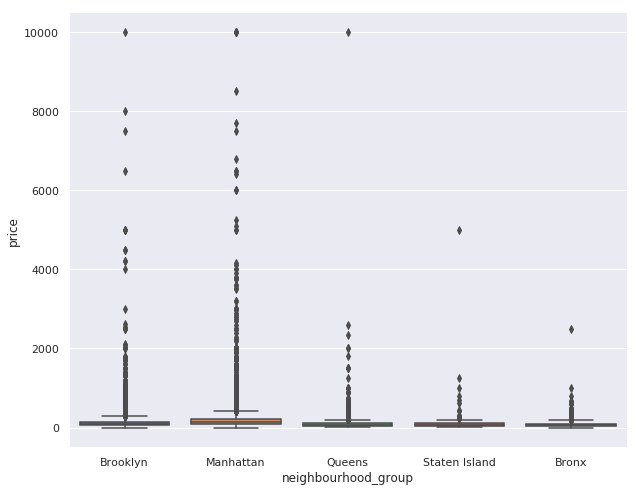

In [17]:
sns.boxplot(x='neighbourhood_group', y='price', data=listings)

Zoom in on listings with price lower than 500 to eliminate outliners

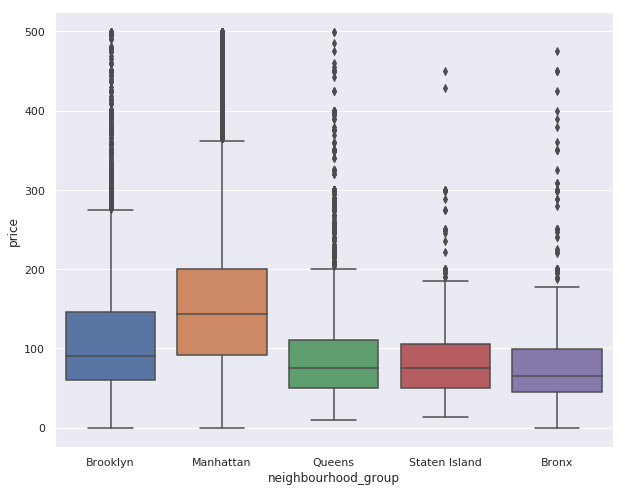

In [18]:
sns.boxplot(x='neighbourhood_group', y='price', data=listings[listings['price']<500])

After removing outliners, Mahattan still shows the most volatile pricing ranges and highest average price. Bronx is completely the opposite.

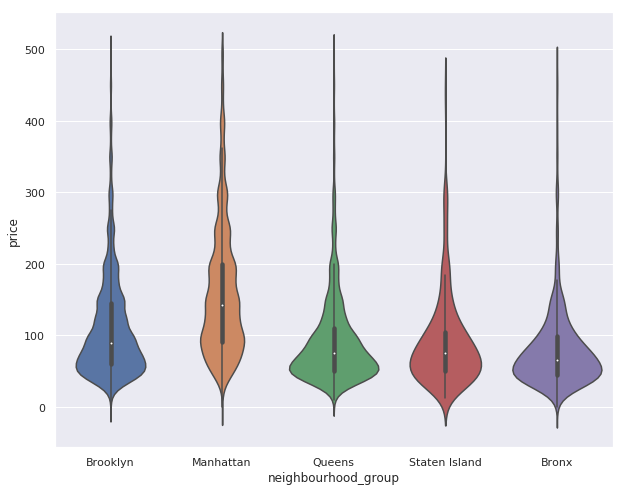

In [19]:
sns.violinplot(x='neighbourhood_group', y='price', data=listings[listings['price']<500])

#### Top 10 neighbourhoods

In [0]:
top_neighbors = listings['neighbourhood'].value_counts().head(10)

In [21]:
top_neighbors

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [0]:
popular_neighbourhood = listings[listings['neighbourhood'].isin(top_neighbors.index)]

In [23]:
popular_neighbourhood.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

,neighbourhood,room_type,price
0,Bedford-Stuyvesant,Entire home/apt,154.780641
1,Bedford-Stuyvesant,Private room,73.296860
2,Bedford-Stuyvesant,Shared room,50.376471
3,Bushwick,Entire home/apt,145.784661
4,Bushwick,Private room,62.623037
5,Bushwick,Shared room,37.382353
6,Crown Heights,Entire home/apt,159.631094
7,Crown Heights,Private room,68.573077
8,Crown Heights,Shared room,50.880000
9,East Village,Entire home/apt,226.305983


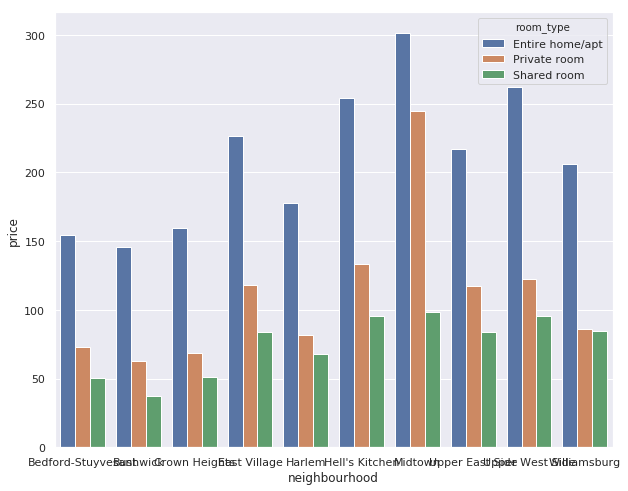

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x='neighbourhood', y='price', hue='room_type', data=popular_neighbourhood.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index())

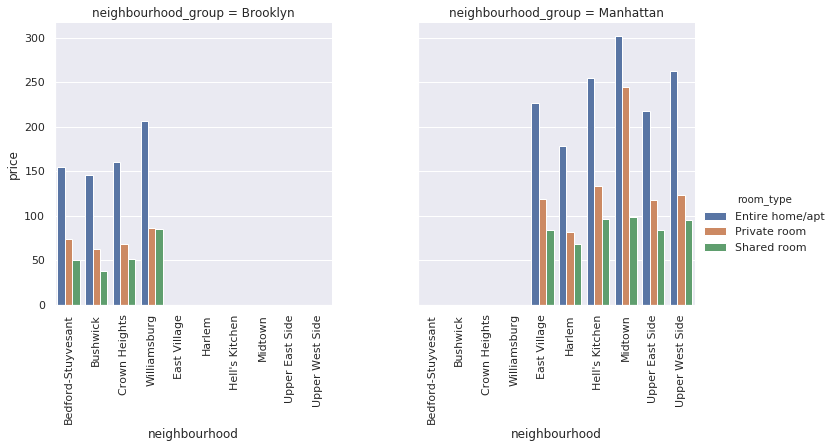

In [25]:
plt2 = sns.catplot(x='neighbourhood', y='price', hue='room_type', col='neighbourhood_group', \
            data=popular_neighbourhood.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])['price'].mean().reset_index(), kind='bar')
plt2.set_xticklabels(rotation=90)

For the top 10 neighbourhoods, they are either from Manhattan or Brooklyn neighbourhood_group. Not surprising  because they are the most two popular travel destitations. Pricing in Manhattan overall is higher than those in Brooklyn. Obviously Entire home/apt is the most expensive than private room or shared room.


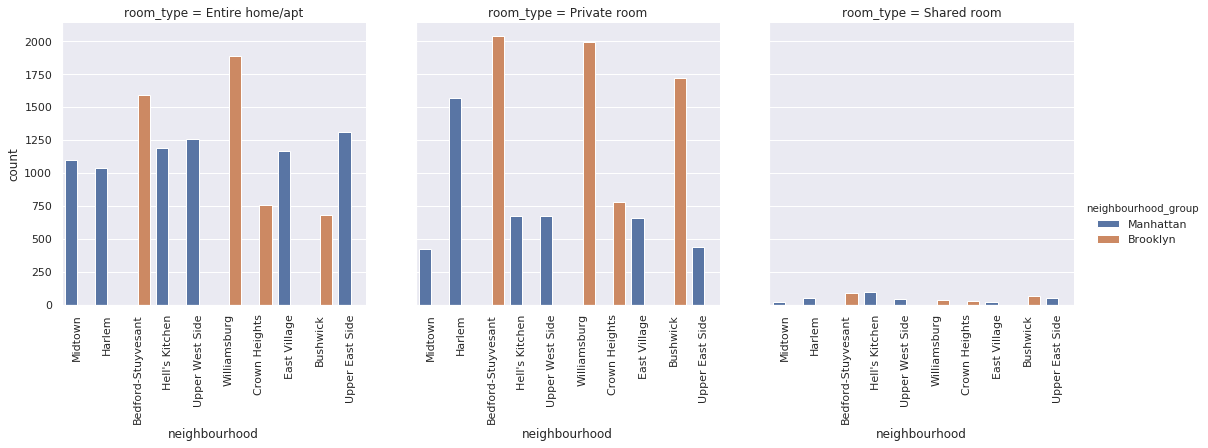

In [40]:
#plt3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=popular_neighbourhood, kind='count')
#plt3.set_xticklabels(rotation=90)

#### Geolcation

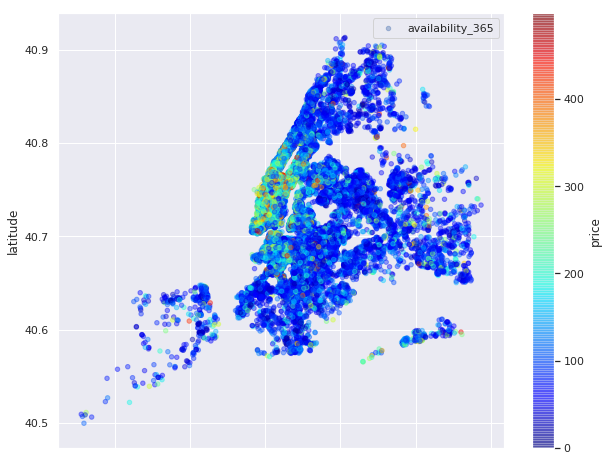

In [45]:
# price < 500 (removing outliners)
plt4 = listings[listings['price']<500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', \
               cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt4.legend()

In [0]:
import os
os.getcwd()

'/content'

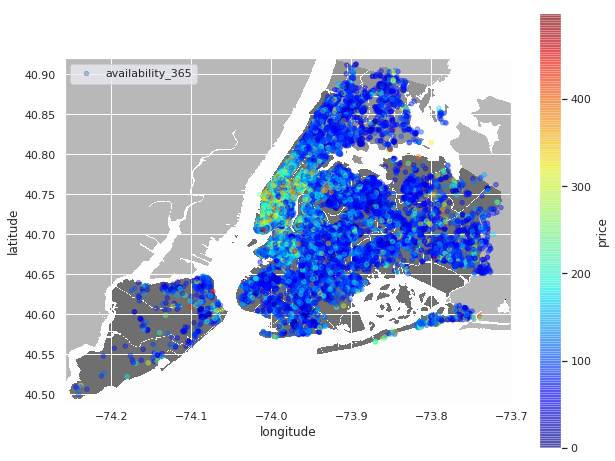

In [46]:
# plot scatter on top of the city image 
plt.figure(figsize=(10,8))
img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/airbnb/New_York_City_.png', 0)
plt.imshow(img, zorder = 0, extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
listings[listings['price']<500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', \
               ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

#### Google Map API

In [26]:
!pip install gmplot

     |████████████████████████████████| 122kB 6.4MB/s 
  Created wheel for gmplot: filename=gmplot-1.2.0-cp36-none-any.whl size=143765 sha256=f011f61d2964bcf17a0b722fc8b221d15ef6cb5a79b4e4e1b63022435bcf4648
  Stored in directory: /root/.cache/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot


In [0]:
import gmplot

In [0]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/content/drive/My Drive/Colab Notebooks/airbnb/')

from apikey import *

In [0]:
gmap = gmplot.GoogleMapPlotter(40.66372975, -74.5346099, 15, apikey=key)

gmap.scatter(listings[listings['price']<500]['latitude'][:1000], listings[listings['price']<500]['longitude'][:1000], '# FF0000', \
                                size = 40, marker = False)

gmap.draw("/content/drive/My Drive/Colab Notebooks/airbnb/nyc_gmap.html" )

### Listing name - text mining

In [42]:
listings['name'].head()

0                  Clean & quiet apt home by the park
1                               Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK !
3                     Cozy Entire Floor of Brownstone
4    Entire Apt: Spacious Studio/Loft by central park
Name: name, dtype: object

As a traveler and airbnb user myself, I believe name and description of a listing play an important role, second to pictures. Therefore, it is interesting to see if some keywords have some impact to price, popularity, etc.
To process, first we need to take out punctuations and stop words, and build a word of bag based on word frequency. 

##### Keras text preprocessing

In [0]:
listings['name'] = listings['name'].astype(str)

In [44]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', \
              lower=True, split=' ', char_level=False, oov_token=None)
t.fit_on_texts(listings['name'])

Using TensorFlow backend.


In [45]:
len(t.word_counts)

8795

In [46]:
t.word_index.keys()

dict_keys(['in', 'room', 'bedroom', 'private', 'apartment', 'cozy', 'apt', '1', 'brooklyn', 'studio', 'the', 'to', '2', 'spacious', 'manhattan', 'park', 'with', 'east', 'of', 'sunny', 'and', 'williamsburg', 'beautiful', 'near', 'village', 'nyc', 'w', 'loft', 'large', 'heart', 'bed', 'a', 'home', 'modern', 'central', 'bright', 'luxury', 'from', 'location', 'west', 'new', '1br', 'side', 'bushwick', 'charming', 'upper', 'one', 'for', 'br', 'midtown', '3', 'quiet', 'brownstone', 'great', 'clean', 'harlem', 'square', 'on', 'close', 'bath', 'subway', 'garden', 'huge', 'heights', 'by', 'times', 'prime', 'duplex', 'min', 'city', 'amazing', 'house', '2br', 'train', 'view', 'chelsea', 'suite', 'lovely', 'renovated', 'big', 'space', 'bathroom', 'soho', 'best', 'york', 'astoria', 'comfortable', '5', 'comfy', 'floor', 'slope', 'hill', 'gorgeous', 'entire', 'prospect', 'jfk', '4', 'greenpoint', 'kitchen', 'place', 'mins', 'views', 'perfect', 'two', 'townhouse', 'balcony', 'away', 'backyard', 'minute

In [0]:
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

##### nltk

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [48]:
listings['name'][:5]

0                  Clean & quiet apt home by the park
1                               Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK !
3                     Cozy Entire Floor of Brownstone
4    Entire Apt: Spacious Studio/Loft by central park
Name: name, dtype: object

In [0]:
tokenizer = WordPunctTokenizer()
tokens = tokenizer.tokenize(listings['name'][0])

In [50]:
tokens

['Clean', '&', 'quiet', 'apt', 'home', 'by', 'the', 'park']

In [0]:
stemmer = PorterStemmer()

In [0]:
bigram_finder = BigramCollocationFinder.from_words(tokens)
bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 500)

In [53]:
bigrams

[('&', 'quiet'),
 ('Clean', '&'),
 ('apt', 'home'),
 ('by', 'the'),
 ('home', 'by'),
 ('quiet', 'apt'),
 ('the', 'park')]

In [0]:
for bigram_tuple in bigrams:
  x = "%s %s" % bigram_tuple
  tokens.append(x)

In [55]:
tokens

['Clean',
 '&',
 'quiet',
 'apt',
 'home',
 'by',
 'the',
 'park',
 '& quiet',
 'Clean &',
 'apt home',
 'by the',
 'home by',
 'quiet apt',
 'the park']

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
result = [' '.join([stemmer.stem(w).lower() for w in x.split()]) \
          for x in tokens if x.lower() not in stopwords.words('english')]

In [58]:
result

['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'park',
 '& quiet',
 'clean &',
 'apt home',
 'by the',
 'home by',
 'quiet apt',
 'the park']

##### no API

In [60]:
text = listings.name
text[:10]

0                  Clean & quiet apt home by the park
1                               Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK !
3                     Cozy Entire Floor of Brownstone
4    Entire Apt: Spacious Studio/Loft by central park
5           Large Cozy 1 BR Apartment In Midtown East
6                                     BlissArtsSpace!
7                    Large Furnished Room Near B'way 
8                  Cozy Clean Guest Room - Family Apt
9                  Cute & Cozy Lower East Side 1 bdrm
Name: name, dtype: object

In [0]:
import re

In [65]:
re.sub(r'[^\w\s]','',text[0])

'Clean  quiet apt home by the park'

In [66]:
bigrams = [b for l in text for b in zip(l.split(' ')[:-1], l.split(' ')[1:])]
bigrams

[('Clean', '&'),
 ('&', 'quiet'),
 ('quiet', 'apt'),
 ('apt', 'home'),
 ('home', 'by'),
 ('by', 'the'),
 ('the', 'park'),
 ('Skylit', 'Midtown'),
 ('Midtown', 'Castle'),
 ('THE', 'VILLAGE'),
 ('VILLAGE', 'OF'),
 ('OF', 'HARLEM....NEW'),
 ('HARLEM....NEW', 'YORK'),
 ('YORK', '!'),
 ('Cozy', 'Entire'),
 ('Entire', 'Floor'),
 ('Floor', 'of'),
 ('of', 'Brownstone'),
 ('Entire', 'Apt:'),
 ('Apt:', 'Spacious'),
 ('Spacious', 'Studio/Loft'),
 ('Studio/Loft', 'by'),
 ('by', 'central'),
 ('central', 'park'),
 ('Large', 'Cozy'),
 ('Cozy', '1'),
 ('1', 'BR'),
 ('BR', 'Apartment'),
 ('Apartment', 'In'),
 ('In', 'Midtown'),
 ('Midtown', 'East'),
 ('Large', 'Furnished'),
 ('Furnished', 'Room'),
 ('Room', 'Near'),
 ('Near', "B'way"),
 ("B'way", ''),
 ('Cozy', 'Clean'),
 ('Clean', 'Guest'),
 ('Guest', 'Room'),
 ('Room', '-'),
 ('-', 'Family'),
 ('Family', 'Apt'),
 ('Cute', '&'),
 ('&', 'Cozy'),
 ('Cozy', 'Lower'),
 ('Lower', 'East'),
 ('East', 'Side'),
 ('Side', '1'),
 ('1', 'bdrm'),
 ('Beautiful', '1